<div style="text-align: center;">
    <h1>Classification Problems: Naive Bayes</h1>
    <h3>Mohammad Nourbakhsh Marvast</h3>
</div>


In [1]:
import numpy as np;
import matplotlib.pyplot as plt;
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.metrics import confusion_matrix

## Naive Bayes Class

Bayes' theorem states that for a given class $C$ and feature vector $\mathbf{x} = (x_1,x_2,\dots,x_n)$:
$$
P(C \mid \mathbf{x}) = \frac{P(\mathbf{x} \mid C) P(C)}{P(\mathbf{x})}.
$$
Since $P(\mathbf{x})$ is constant across classes, we have
$$
P(C \mid \mathbf{x}) \propto P(C) \prod_{i=1}^n P(x_i \mid C).
$$
Thus, the classifier assigns the class label by:
$$
\hat{C} = \arg\max_{C} \; P(C) \prod_{i=1}^n P(x_i \mid C).
$$
or equivalently
$$
\hat{C} = \arg\max_{C} \;  \Big(\log P(C) + \sum_{i=1}^n \log P(x_i \mid C) \Big).
$$


In [9]:
def _gaussian_pdf(x, mean, var):
  # Compute probability density of x for a Gaussian with given mean and var
  # Avoid division by zero in variance by adding a tiny value (if needed)
  eps = 1e-9
  coeff = 1.0 / np.sqrt(2.0 * np.pi * (var + eps))
  exponent = np.exp( - ((x - mean) ** 2) / (2 * (var + eps)) )
  return coeff * exponent

In [10]:
class naive_bayes:
  def __init__(self, likelihood_func= _gaussian_pdf):
    self.likelihood_func = likelihood_func
    self.classes_ = None
    self.priors_ = {}      # P(C)
    self.means_ = {}       # mean for each feature per class
    self.vars_ = {}        # variance for each feature per class

  def fit (self, X_train, y_train):
    self.classes_ = np.unique(y_train)
    n_classes, n_features = X_train.shape
    self.means_ = np.zeros((n_classes, n_features))
    self.vars_ = np.zeros((n_classes, n_features))
    self.priors_ = np.zeros(n_classes)

    for c in self.classes_:
      X_train_c = X_train[y_train==c]
      self.priors_[c] = X_train_c.shape[0] / n_classes
      self.means_[c] = X_train_c.mean(axis=0)
      self.vars_[c] = X_train_c.var(axis=0)

  def _predict(self, x):
    posteriors = {}
    for c in self.classes_:
      mean = self.means_[c]
      var = self.vars_[c]
      log_prior = np.log(self.priors_[c])
      log_likelihood = np.sum(np.log(self.likelihood_func(x, mean, var)))
      posteriors[c]= log_prior + log_likelihood

    return max(posteriors, key=posteriors.get)

  def predict (self, X_test):
    y_pred = [self._predict(x) for x in X_test]
    return np.array(y_pred)

## Cancer Dataset

In [11]:
from sklearn.datasets import load_breast_cancer

In [13]:
# Load dataset
data_frame = load_breast_cancer()
data = data_frame.data
target = data_frame.target

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
clf = naive_bayes()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [19]:
cmt = confusion_matrix(y_test, y_pred)
acc = np.trace(cmt)/np.sum(np.sum(cmt))
print("Naive Bayes accuracy: ", acc)


Naive Bayes accuracy:  0.9649122807017544


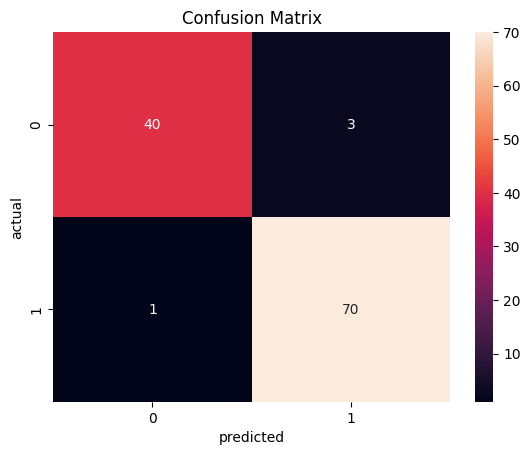

In [18]:
plt.figure()
sns.heatmap(cmt, annot=True, fmt="d")
plt.title("Confusion Matrix"); plt.xlabel("predicted");
plt.ylabel("actual")
plt.show()

## Wine Dataset

In [20]:
from sklearn.datasets import load_wine

In [21]:
# Load dataset
data_frame = load_wine()
data = data_frame.data
target = data_frame.target

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

y_train0 = np.where(y_train == 0, 0, 1)
y_train1 = np.where(y_train == 1, 0, 1)
y_train2 = np.where(y_train == 2, 0, 1)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
clf = naive_bayes()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [25]:
cmt = confusion_matrix(y_test, y_pred)
acc = np.trace(cmt)/np.sum(np.sum(cmt))
print("percepton accuracy: ", acc)

percepton accuracy:  1.0


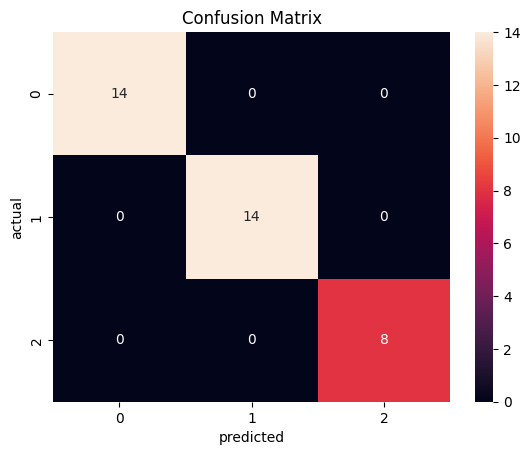

In [26]:
plt.figure()
sns.heatmap(cmt, annot=True, fmt="d")
plt.title("Confusion Matrix"); plt.xlabel("predicted");
plt.ylabel("actual")
plt.show()

## Iris Dataset

In [27]:
from sklearn.datasets import load_iris

In [28]:
data_frame = load_iris()
data = data_frame.data
target = data_frame.target

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
clf = naive_bayes()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

percepton accuracy:  1.0


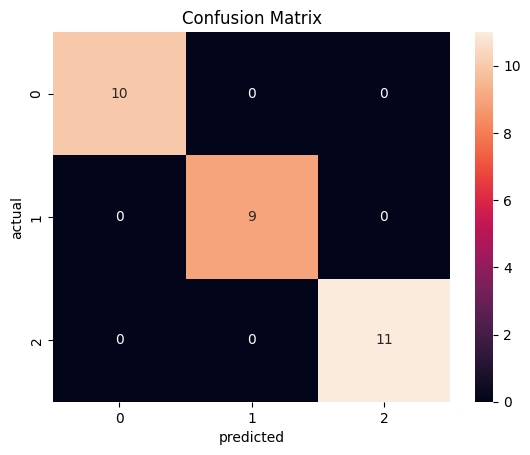

In [32]:
cmt = confusion_matrix(y_test, y_pred)
acc = np.trace(cmt)/np.sum(np.sum(cmt))
print("percepton accuracy: ", acc)

plt.figure()
sns.heatmap(cmt, annot=True, fmt="d")
plt.title("Confusion Matrix"); plt.xlabel("predicted");
plt.ylabel("actual")
plt.show()